# K-means Clustering
Author: Nico Kuijpers  
Date: March 28, 2021

## Introduction
K-means clustering is one of the machine learning algorithms that can be applied for unsupervised learning. In this notebook we give an example of how to apply K-means clustering on the Iris dataset.

First import the libraries we need.

In [165]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.16.2
pandas version: 0.24.2
scikit-learn version: 0.24.1
seaborn version: 0.9.0
matplotlib version: 3.0.3


## The unsupervised learning classification steps: overview

This notebook implements all specific tasks in applying unsupervised machine learning techniques:

* Preparing the data, 
* Analysing and visualising the data, 
* Cleaning the data, 
* Selecting features, 
* Training your Machine learning algorithm, 
* Applying the machine learning algorithm, 
* and Evaluating its results.

Note that for unsupervised learning, we skip the step 'Dividing your data in a training and test set'.

## Step 1: Preparing the data
To illustrate K-means clustering we use the Iris dataset. The dataset consists of 149 entries, 4 input features, and 1 output label. The data set consists of about 50 samples from each of three species of Iris: Iris setosa, Iris virginica, and Iris versicolor. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

During clustering, we ignore the labels (unsupervised learning). We can compare the results of clustering with the labels afterwards. 

For more information on the Iris dataset, see https://en.wikipedia.org/wiki/Iris_flower_data_set

### Download the dataset

In [166]:
# Download the Iris dataset from the internet
df_iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

### Explore the dataset
Get a first impression of the dataset by printing the data format and showing the first 5 rows and last 5 rows
of the DataFrame.

In [167]:
# Explore the Iris dataset
df_iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
print('Iris dataset shape: {}'.format(df_iris.shape))
df_iris.head(5)

Iris dataset shape: (149, 5)


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [168]:
df_iris.tail(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


Print the different species in the dataset.

In [169]:
print(df_iris['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Print the number of flowers for each species and visualize these numbers using a bar plot.

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64


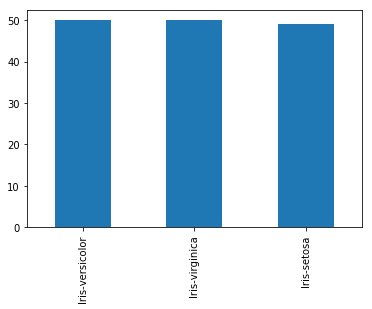

In [170]:
print(df_iris['Species'].value_counts())
df_iris['Species'].value_counts().plot(kind='bar')

Method `pandas.DataFrame.info()` prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage. See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html.

In [171]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
Sepal Length    149 non-null float64
Sepal Width     149 non-null float64
Petal Length    149 non-null float64
Petal Width     149 non-null float64
Species         149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Method `pandas.DataFrame.describe()` generates descriptive statistics. These include central tendency, dispersion,
and shape of a dataset's distribution, excluding NaN values. 
See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe

In [172]:
df_iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 2: Analysing and visualising the data


Analyse the dataset using a box-and-whisker plot generated by method `pandas.DataFrame.boxplot()`. 
See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
    
For more information on box plots, see https://en.wikipedia.org/wiki/Box_plot

From the box plot below, it can be observed that for Sepal Length and Sepal Width, 
there is some overlap in values for the three different species. Petal Length and
Petal Width show less overlap. This information may be useful when selecting features.

**Note**: by default, the box plot will be partly shown and a scroll bar appears. To view the 
entire box plot, select Cell &#8594; All Output &#8594; Toggle Scrolling.

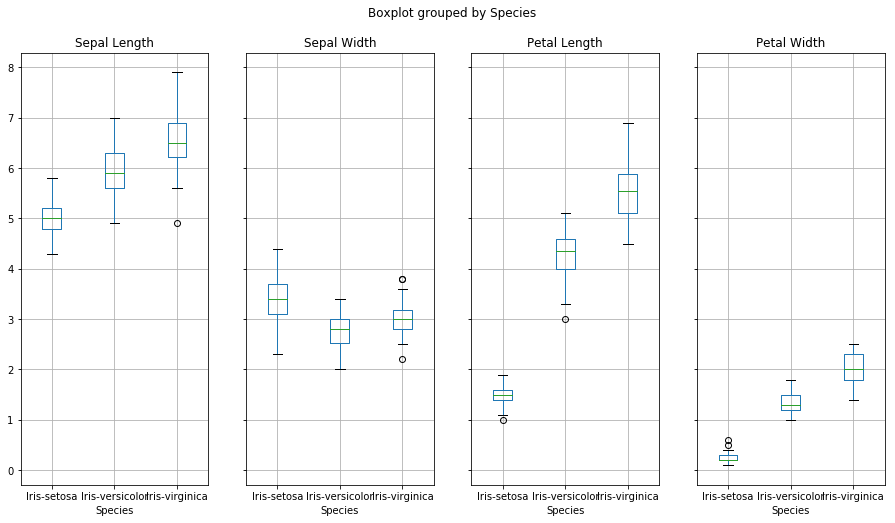

In [173]:
iris_features = tuple(df_iris.columns[:4].values)
df_iris.boxplot(column=iris_features, by='Species', figsize=(15,8), layout=(1,4));

Plot pairwise relationships using method `seaborn.pairplot`. 
See https://seaborn.pydata.org/generated/seaborn.pairplot.html

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 576x576 with 0 Axes>

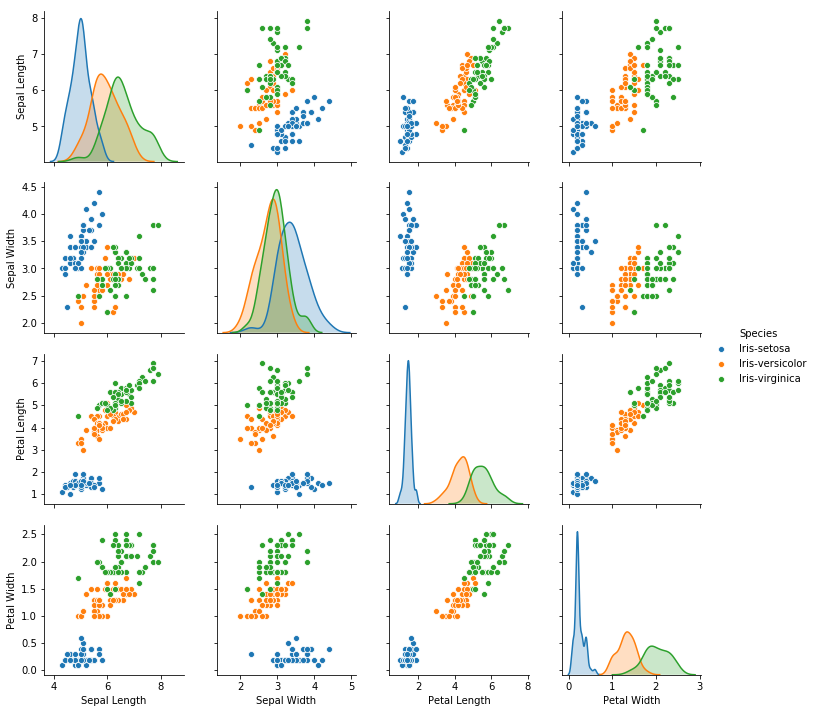

In [174]:
plt.figure(figsize=(8,8))
ax = sns.pairplot(df_iris, hue='Species')
plt.show

## Step 3: Cleaning the data
There is no need to clean the data.

## Step 4:  Selecting the features
Use all 4 features for clustering. 
From the box plots it can be observed that the values range between 0 and 8 cm and that the distribution 
differs per feature. 
For instance, Sepal Length ranges between 4 and 8 cm, while Petal Width ranges between 0 and 3 cm. 
When applying K-means clustering it is important to normalize the data. Using the `StandardScaler`, 
the standard score of a sample $x$ is calculated as $z=(x-u)/s$, where $u$ is the mean and $s$ is 
the standard deviation.

In [175]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Define X_iris and y_iris

# Use this line to select all four features
X_iris = df_iris[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]

# Use this line to select Sepal Length and Sepal Width
#X_iris = df_iris[['Sepal Length', 'Sepal Width']]

# Use this line to select Petal Length and Petal Width
#X_iris = df_iris[['Petal Length', 'Petal Width']]

# Note that we will not use y_iris during clustering
y_iris = df_iris['Species']
print('Iris types:', y_iris.unique())

# Normalize the data
#scaler_iris = StandardScaler().fit(X_iris)
scaler_iris = MinMaxScaler().fit(X_iris)
X_iris_normalized = scaler_iris.transform(X_iris)
print('The length of X_iris_normalized: ', len(X_iris))


Iris types: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
The length of X_iris_normalized:  149


Visualize the distribution of the data per feature after normalization.

Number of selected features:  4


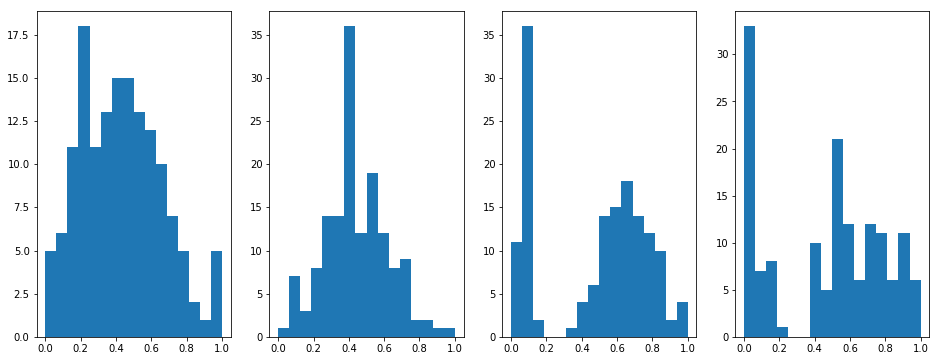

In [176]:
# Define number of bins for histogram
nbins = 16

# Number of selected features
nfeatures = len(X_iris.columns)
print('Number of selected features: ',nfeatures)

# Plot histograms for each of the selected features
fig, axs = plt.subplots(1,nfeatures,figsize=(nfeatures*4,6))
for f in range(nfeatures):
    axs[f].hist(X_iris_normalized[:,f],nbins)

## Step 5: Training your machine learning algorithm
For K-means clustering we have to select the number of clusters we expect. In this case we expect 3 clusters, 
because there are 3 different species in the dataset. However, in general we do not know how many clusters best fits the dataset. We will discuss determining the number of clusters later (see Appendix C: The Elbow method).

To perform the clustering, we use `sklearn.cluster.KMeans`. Except for the number of clusters, we use default values
for all parameters, see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [177]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Use this line for k-means clustering using normalized data
#kmeans.fit(X_iris_normalized)

# Use this line for k-means clustering with original data (not normalized)
kmeans.fit(X_iris)

KMeans(n_clusters=3, random_state=42)

Cluster centers are stored in an ndarray of shape (n_clusters, n_features)

In [178]:
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.00408163 3.41632653 1.46530612 0.24489796]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


Cluster labels are stored in an ndarray of shape (n_samples)

In [179]:
print(np.unique(kmeans.labels_))

[0 1 2]


Parameter `max_iter` represents the maximum number of iterations for a single run. The default value is 300.
The K-means clustering algorithm stops when no more datapoints move from one cluster to another or 
when the maximum number of iterations has been reached.
The actual number of iterations is usually much lower.

In [180]:
print(kmeans.n_iter_)

2


K-means clustering aims to minimize the Sum of squared distances of samples from their cluster center:

In [181]:
print(kmeans.inertia_)

78.91880877308479


## Step 6: Applying your machine learning algorithm
For each datapaint, add the cluster to the original Iris data set.

In [182]:
df_iris['Cluster'] = kmeans.labels_.astype(str)
df_iris['Cluster'] = 'Cluster ' + df_iris['Cluster']
df_iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Cluster
0,4.9,3.0,1.4,0.2,Iris-setosa,Cluster 1
1,4.7,3.2,1.3,0.2,Iris-setosa,Cluster 1
2,4.6,3.1,1.5,0.2,Iris-setosa,Cluster 1
3,5.0,3.6,1.4,0.2,Iris-setosa,Cluster 1
4,5.4,3.9,1.7,0.4,Iris-setosa,Cluster 1


In [183]:
df_iris.tail(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Cluster
144,6.7,3.0,5.2,2.3,Iris-virginica,Cluster 0
145,6.3,2.5,5.0,1.9,Iris-virginica,Cluster 2
146,6.5,3.0,5.2,2.0,Iris-virginica,Cluster 0
147,6.2,3.4,5.4,2.3,Iris-virginica,Cluster 0
148,5.9,3.0,5.1,1.8,Iris-virginica,Cluster 2


Plot pairwise relationships per species and per cluster using method `seaborn.pairplot`. 

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 576x576 with 0 Axes>

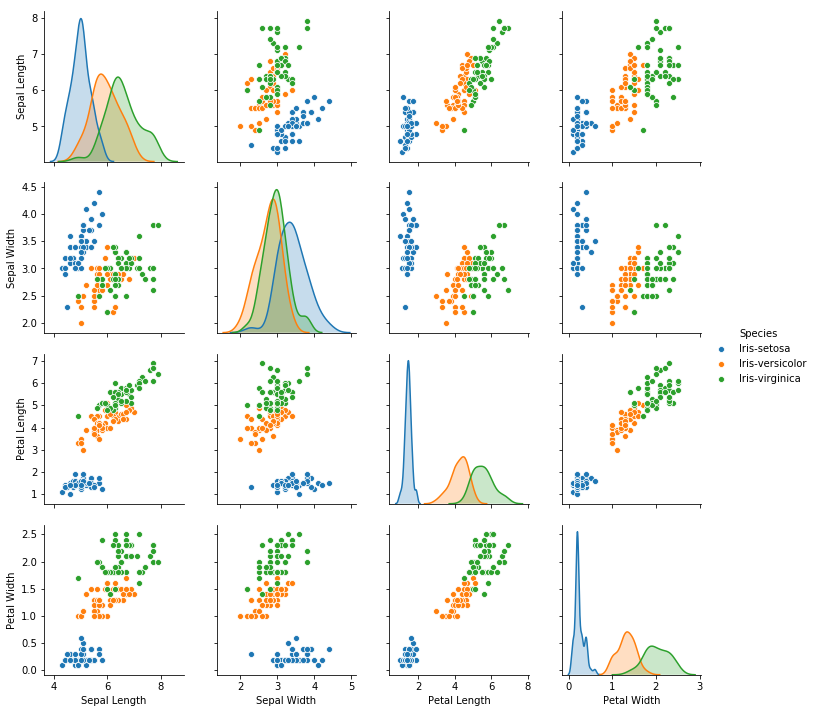

<Figure size 576x576 with 0 Axes>

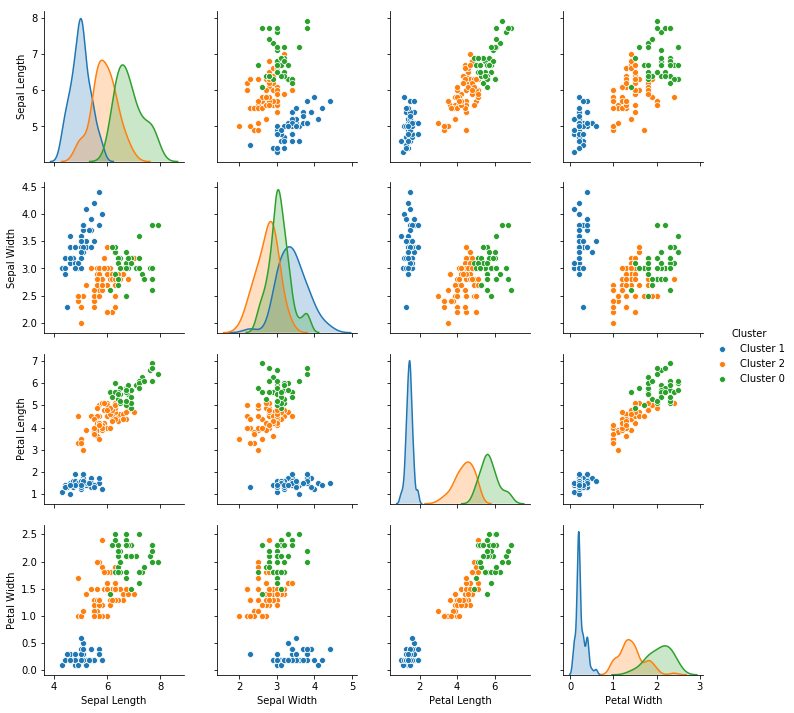

In [184]:
plt.figure(figsize=(8,8))
ax = sns.pairplot(df_iris[["Sepal Length","Sepal Width","Petal Length","Petal Width","Species"]], hue="Species")
plt.show

plt.figure(figsize=(8,8))
ax = sns.pairplot(df_iris[["Sepal Length","Sepal Width","Petal Length","Petal Width","Cluster"]], hue="Cluster")
plt.show

## Step 7: Evaluating the results
If clustering is successful, one may expect that flowers of the same species end up in the same cluster.
Let us check whether this is the case.

Code for the bar plot is adapted from
https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

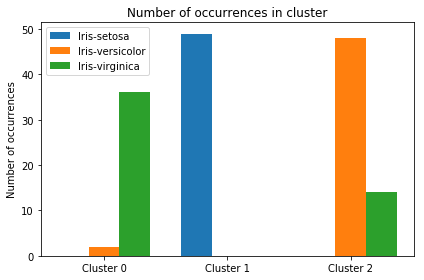

In [185]:
# Define labels for species
species = df_iris['Species'].unique()

# Define labels for clusters
clusters = df_iris['Cluster'].unique()

# Sort cluster names in alphabetical order, i.e.,
# Cluster 0, Cluster 1, Cluster 2, etc.
clusters.sort()

# Determine the location for cluster labels 
x = np.arange(len(clusters))

# Define the width of the bars
width = 0.75/len(species)

# Create the bar plot
fig, ax = plt.subplots()
offset = -width
for spec in species:
    nr_occurrences = []
    for clus in clusters:
        nr = df_iris[(df_iris['Species']==spec) & (df_iris['Cluster']==clus)]['Cluster'].count()
        nr_occurrences.append(nr)
    rects = ax.bar(x + offset, nr_occurrences, width, label=spec)
    offset = offset + width

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of occurrences')
ax.set_title('Number of occurrences in cluster')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

fig.tight_layout()
plt.show()

In [186]:
print(df_iris['Species'].value_counts())
print(df_iris['Cluster'].value_counts())

species = df_iris['Species'].unique()
for spec in species:
    print('Number of samples per cluster for',spec)
    print(df_iris[df_iris['Species']==spec]['Cluster'].value_counts())

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64
Cluster 2    62
Cluster 1    49
Cluster 0    38
Name: Cluster, dtype: int64
Number of samples per cluster for Iris-setosa
Cluster 1    49
Name: Cluster, dtype: int64
Number of samples per cluster for Iris-versicolor
Cluster 2    48
Cluster 0     2
Name: Cluster, dtype: int64
Number of samples per cluster for Iris-virginica
Cluster 0    36
Cluster 2    14
Name: Cluster, dtype: int64


## Appendix A: The effect of normalization before clustering
Change the code in Step 5 such that `X_iris` is used instead of `X_iris_normalized` when applying `KMeans`.
Rerun all cells above and compare the results after clustering (Step 6 and Step 7). 
Note that you should not compare the values of `kmeans.inertia_`, because this measure changes 
with normalization.

## Appendix B: The effect of the initial cluster centroids
By default, the K-means cluster algorithm will be run 10 times with different initial cluster centroids.
Parameter `n_init` determines how often the algorithm will be restarted.
To evaluate the effect of beginning with different initial cluster centroids, parameter `n_init` is set to 1 and
K-means is applied 20 times with different values for parameter `random_state`.

In [187]:
for n in range (20):
    kmeans = KMeans(n_clusters=3, random_state=n, n_init=1)
    kmeans.fit(X_iris_normalized)
    print('Random state = ',n,'\tNr iterations',kmeans.n_iter_,'\tSum of squared distances ',kmeans.inertia_)

Random state =  0 	Nr iterations 9 	Sum of squared distances  7.136297775737774
Random state =  1 	Nr iterations 4 	Sum of squared distances  10.903329533346655
Random state =  2 	Nr iterations 5 	Sum of squared distances  6.99576407657916
Random state =  3 	Nr iterations 3 	Sum of squared distances  6.99576407657916
Random state =  4 	Nr iterations 5 	Sum of squared distances  6.99576407657916
Random state =  5 	Nr iterations 5 	Sum of squared distances  6.99576407657916
Random state =  6 	Nr iterations 6 	Sum of squared distances  7.136297775737774
Random state =  7 	Nr iterations 8 	Sum of squared distances  7.136297775737774
Random state =  8 	Nr iterations 5 	Sum of squared distances  6.99576407657916
Random state =  9 	Nr iterations 9 	Sum of squared distances  7.136297775737774
Random state =  10 	Nr iterations 5 	Sum of squared distances  7.136297775737774
Random state =  11 	Nr iterations 6 	Sum of squared distances  7.136297775737774
Random state =  12 	Nr iterations 9 	Sum o

## Appendex C: The Elbow method
To determine the optimal amount of clusters, *k*, the Elbow method can be applied as follows.
Plot the number of clusters versus the Sum of squared distances. If the plot resembles
an arm, the optimal number of clusters is near the elbow.

See also: https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/

The code below is adapted from:
https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [188]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_iris_normalized)
    Sum_of_squared_distances.append(kmeans.inertia_)
    print('Nr clusters',k,'\tSum of squared distances ',kmeans.inertia_)

Nr clusters 1 	Sum of squared distances  40.72528308317258
Nr clusters 2 	Sum of squared distances  12.141338353332117
Nr clusters 3 	Sum of squared distances  6.99576407657916
Nr clusters 4 	Sum of squared distances  5.530481074834298
Nr clusters 5 	Sum of squared distances  4.572738645154331
Nr clusters 6 	Sum of squared distances  3.9442723556633337
Nr clusters 7 	Sum of squared distances  3.457658893582642
Nr clusters 8 	Sum of squared distances  3.110999583057065
Nr clusters 9 	Sum of squared distances  2.80874541178331
Nr clusters 10 	Sum of squared distances  2.5301916765533106


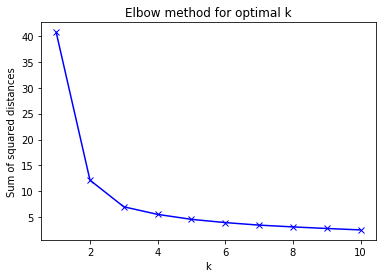

In [189]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal k')
plt.show()

## Appendix D: Feature selection (revisited)
In Step 4, all four features in the dataset were selected for clustering. 
However, when looking at the box plot in Step 3, one may observe that the values for 
Petal Length and Petal Width are more distinctive per species compared to Sepal Length and Sepal Width.
Go back to Step 4 and select Sepal Length and Sepal Width as features for clustering.
Do the same for Petal Length and Petal Width. Compare the results after clustering.
You can simply change the line of code and then choose Cell &#8594; Run All.